In [1]:
import numpy as np
import pandas as pd

import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data = data.drop("Id", axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 80)

In [6]:
from sklearn.model_selection import train_test_split as tts
train_data, test_data = tts(data,test_size = 0.2, random_state = 42)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBu

In [8]:
house = train_data.copy()
corr_matrix = house.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.480351
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
3SsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: SalePrice, dtype: float64

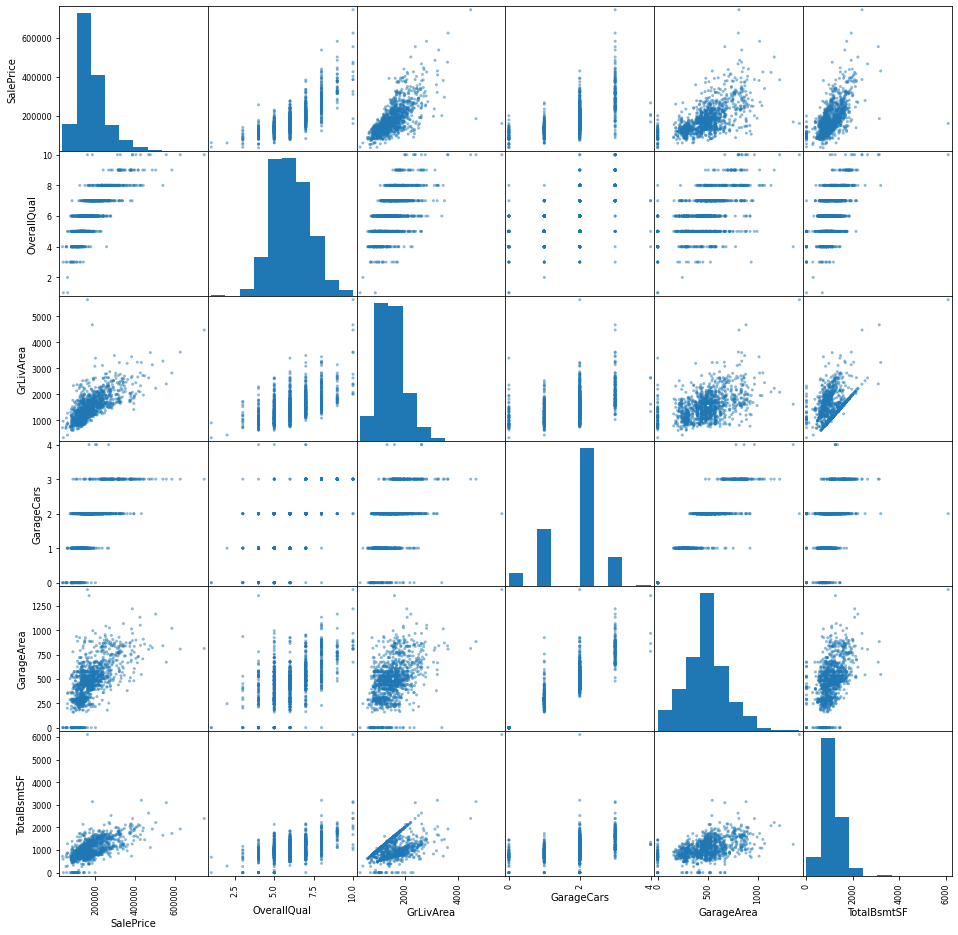

In [13]:
#plot dataset
from pandas.plotting import scatter_matrix
attributes = ["SalePrice","OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]
scatter_matrix(house[attributes], figsize=(16, 16));

#### Select one ML Model from sklearn 

In [19]:
x_train = train_data.drop("SalePrice", axis = 1)
y_train = train_data["SalePrice"].copy()

In [20]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [21]:
y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

In [22]:
x_train.shape

(1168, 79)

In [28]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
# function for getting all categorical_columns
def get_categorical_columns(df):
    categorical_columns_selector = selector(dtype_include=object)
    categorical_columns = categorical_columns_selector(df)
    return categorical_columns

In [29]:
#function for getting all numberical columns
def get_numberical_columns(df):
    numberical_columns_selector = selector(dtype_exclude = object)
    numberical_columns = numberical_columns_selector(df)
    return numberical_columns

In [34]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#function for transforming dataset 
def transformation(df):
    df = df.copy()
    
    numberical_columns = get_numberical_columns(df)
    categorial_columns = get_categorical_columns(df)
    
    numberical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())])
    nominal_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer([
        ('numberical_transformer', numberical_pipeline, numberical_columns),
        ('nominal_transformer', nominal_pipeline, categorial_columns),
    ])
    
    preprocessor.fit(df)
    
    return preprocessor


In [37]:
preprocessor= transformation(x_train)
x_train_prepared = preprocessor.transform(x_train)
x_train_prepared.shape

(1168, 286)

In [40]:
from sklearn.model_selection import GridSearchCV


#function for tuning the model with hyper-parameter

def tune_model(model, param_grid, x_train,prepared):
    grid_search = GridSearchCV(model,param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
    grid_search.fit(x_train_prepared, y_train)
    print('grid_search.best_estimator_: ', grid_search.best_estimator_)
    final_model = grid_search.best_estimator_
    return final_model

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [50]:
#function to show the performance
def performance(clf):
    y_train_pred = clf.predict(x_train_prepared)
    
    print("RMSE train: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    scores = cross_val_score(lin_reg, x_train_prepared,y_train,scoring = 'neg_mean_squared_error', cv = 3)
    lin_rmse_scores = np.sqrt(-scores)
    print("Validation score RMSE Mean:", lin_rmse_scores.mean(), "; Standard deviation:", lin_rmse_scores.std())
    print("Training set score: {:.2f}".format(clf.score(x_train_prepared, y_train)))

#### Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_prepared, y_train);
performance(lin_reg)

RMSE train:  19509.295241902662
Validation score RMSE Mean: 38546.207757917095 ; Standard deviation: 7648.720077994242
Training set score: 0.94


#### RidgeCV

In [52]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=5).fit(x_train_prepared, y_train)

print("alpha = ", ridge.alpha_)
performance(ridge)

alpha =  10.0
RMSE train:  24395.26865665098
Validation score RMSE Mean: 38546.207757917095 ; Standard deviation: 7648.720077994242
Training set score: 0.90


#### LassoCV

In [53]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [1e-3,1e-2,1e-1,1,10],max_iter=10000, cv=5).fit(x_train_prepared,y_train)

print("alpha = ", lasso.alpha_)
print("Number of features used:", np.sum(lasso.coef_ != 0))
performance(lasso)

alpha =  10.0
Number of features used: 224
RMSE train:  19738.1270528596
Validation score RMSE Mean: 38546.207757917095 ; Standard deviation: 7648.720077994242
Training set score: 0.93


#### VotingRegressor

In [55]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor([('ridge', ridge), ('lasso', lasso)], weights=[1,2])
vr.fit(x_train_prepared, y_train)

performance(vr)

RMSE train:  20476.854522180583
Validation score RMSE Mean: 38546.207757917095 ; Standard deviation: 7648.720077994242
Training set score: 0.93


#### Test data 
using best performence model, which is linear regression 

In [56]:
x_test = test_data.drop("SalePrice", axis=1)
y_test = test_data["SalePrice"].copy()
x_test.shape

(292, 79)

In [57]:
x_test_prepared = preprocessor.transform(x_test) 
x_test_prepared.shape

(292, 286)

In [58]:
import seaborn as sns
# plot the regression
def plot_reg(model):
    y_test_predicted = model.predict(x_test_prepared)
    predicted_actual = {"True values ($)": y_test, "Predicted values ($)": y_test_predicted}
    predicted_actual = pd.DataFrame(predicted_actual)
    
    sns.scatterplot(data=predicted_actual,
                     x="True values ($)", y="Predicted values ($)",
                     color="black", alpha=0.5)
    plt.axline((0, 0), slope=1, label="Perfect fit")
    plt.axis('square')
    plt.title("Regression using a model without \ntarget transformation");

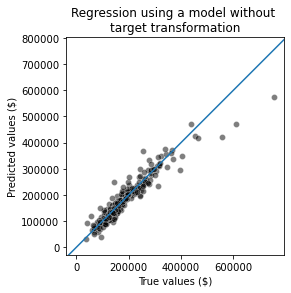

In [59]:
plot_reg(lasso)

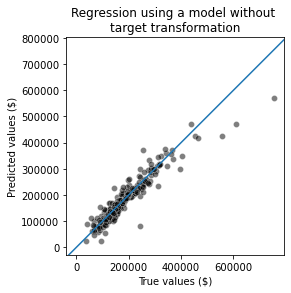

In [60]:
plot_reg(lin_reg)

In [61]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

def target_transform(model):
    quantile_transformer = QuantileTransformer(n_quantiles=900, output_distribution="normal")
    model_transformed_target = TransformedTargetRegressor(regressor=model,
                                transformer=quantile_transformer)

    model_transformed_target.fit(x_train_prepared, y_train)
    return model_transformed_target

In [62]:
target_transform(lasso)

TransformedTargetRegressor(regressor=LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10],
                                             cv=5, max_iter=10000),
                           transformer=QuantileTransformer(n_quantiles=900,
                                                           output_distribution='normal'))

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# show the model permormance on test data
def perfor_test(model):
    y_test_predicted = model.predict(x_test_prepared)
    print(f"Mean absolute error (MAE): " f"{mean_absolute_error(y_test, y_test_predicted):.4f} $")
    print(f"Median absolute error (MedAE): " f"{median_absolute_error(y_test, y_test_predicted):.4f} $")
  

In [64]:
perfor_test(target_transform(lasso))

Mean absolute error (MAE): 14429.2763 $
Median absolute error (MedAE): 9520.8315 $


In [65]:
perfor_test(target_transform(lin_reg))

Mean absolute error (MAE): 15299.1093 $
Median absolute error (MedAE): 9060.3755 $


In [66]:
perfor_test(lin_reg)

Mean absolute error (MAE): 18357.3331 $
Median absolute error (MedAE): 12184.7274 $


In [67]:
perfor_test(lasso)

Mean absolute error (MAE): 17535.9363 $
Median absolute error (MedAE): 11609.3515 $


#### Prediction

In [73]:
test = pd.read_csv("test.csv")
test.shape

(1459, 80)

In [74]:
ID = test['Id']
test = test.drop("Id", axis= 1)
test.shape

(1459, 79)

In [75]:
test_prepared = preprocessor.transform(test)
test_prepared.shape

(1459, 286)

In [76]:
prediction = target_transform(lin_reg).predict(test_prepared)
prediction = pd.DataFrame(data = {'Id':ID, "SalePrice":prediction}).to_csv('prediction.csv', index = False)

In [78]:
#using lasso to predict
prediction = target_transform(lasso).predict(test_prepared)
prediction = pd.DataFrame(data = {'Id':ID, "SalePrice":prediction}).to_csv('prediction_2.csv', index = False)

In [77]:
res = pd.read_csv("prediction.csv")
res.head()

,Id,SalePrice
0,1461,126555.734098
1,1462,170000.000000
2,1463,181126.861652
3,1464,200000.000000
4,1465,190000.000000


In [79]:
res = pd.read_csv("prediction_2.csv")
res.head()

,Id,SalePrice
0,1461,120769.252915
1,1462,147000.000000
2,1463,175000.000000
3,1464,190962.143344
4,1465,190000.000000
